In [95]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를위해 mapplotlib,seaborn 를 불러온다
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# 한글설정 & 마이너스표시
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)

In [97]:
df = pd.read_json('3_data.json',encoding='UTF-8')

In [98]:
df

,response
body,{'items': {'item': [{'addr1': '전라남도 신안군 흑산면 가거...
header,"{'resultCode': '0000', 'resultMsg': 'OK'}"


In [99]:
# 'item' 키에 해당하는 데이터를 데이터프레임으로 변환
df = pd.json_normalize(df['response']['body']['items']['item'])

In [100]:
df.shape


(13040, 21)

In [101]:
## 모든 열 보이게하기 설정
pd.set_option('display.max_columns', 21)
## 모든 행 보이게하기 설정
# pd.set_option('display.max_rows', None)

In [102]:
df.columns

Index(['addr1', 'addr2', 'areacode', 'booktour', 'cat1', 'cat2', 'cat3',
       'contentid', 'contenttypeid', 'createdtime', 'firstimage',
       'firstimage2', 'cpyrhtDivCd', 'mapx', 'mapy', 'mlevel', 'modifiedtime',
       'sigungucode', 'tel', 'title', 'zipcode'],
      dtype='object')

In [103]:
df['booktour'].value_counts()

booktour
0    11292
      1636
1      112
Name: count, dtype: int64

In [104]:
df['title'].head(10)

0        가거도(소흑산도)
1           가계해수욕장
2    가고파 꼬부랑길 벽화마을
3        가곡유황온천&스파
4           가나아트파크
5           가남체육공원
6              가덕도
7           가덕도 등대
8          가덕도 연대봉
9        가덕도대항인공동굴
Name: title, dtype: object

In [105]:
df[['cat1','cat2','cat3']].value_counts()

cat1  cat2   cat3     
A02   A0201  A02010700    1951
      A0202  A02020700    1231
      A0201  A02010800    1041
      A0203  A02030100     965
A01   A0101  A01010500     677
                          ... 
A03   A0302  A03021800       1
A02   A0203  A02030300       1
A03   A0302  A03020700       1
             A03020300       1
             A03021300       1
Name: count, Length: 95, dtype: int64

In [106]:
df.head()

,addr1,addr2,areacode,booktour,cat1,cat2,cat3,contentid,contenttypeid,createdtime,firstimage,firstimage2,cpyrhtDivCd,mapx,mapy,mlevel,modifiedtime,sigungucode,tel,title,zipcode
0,전라남도 신안군 흑산면 가거도길 38-2,(흑산면),38,0,A01,A0101,A01011300,127480,12,20030905090000,,,,125.1125145360,34.0740166502,6,20230918102221,12,,가거도(소흑산도),58866
1,전라남도 진도군 고군면 신비의바닷길 47,(고군면),38,0,A01,A0101,A01011200,126273,12,20031107090000,http://tong.visitkorea.or.kr/cms/resource/36/3...,http://tong.visitkorea.or.kr/cms/resource/36/3...,Type3,126.3547412438,34.4354594945,6,20240110114813,21,,가계해수욕장,58911
2,경상남도 창원시 마산합포구 성호서7길 15-8,,36,0,A02,A0203,A02030100,2019720,12,20150721030848,http://tong.visitkorea.or.kr/cms/resource/55/2...,http://tong.visitkorea.or.kr/cms/resource/55/2...,Type3,128.5696552845,35.2077664004,6,20230412105954,16,,가고파 꼬부랑길 벽화마을,51281
3,강원특별자치도 삼척시 가곡면 탕곡리,509-3,32,,A02,A0202,A02020300,2994116,12,20230717155822,http://tong.visitkorea.or.kr/cms/resource/54/2...,http://tong.visitkorea.or.kr/cms/resource/54/2...,Type3,129.2062296318,37.1507494904,6,20230807093649,4,033-572-1800,가곡유황온천&스파,25954
4,경기도 양주시 장흥면 권율로 117,,31,0,A02,A0202,A02020600,129194,12,20060807090000,http://tong.visitkorea.or.kr/cms/resource/46/2...,http://tong.visitkorea.or.kr/cms/resource/46/2...,Type3,126.9497496852,37.7254519094,6,20231213141137,18,,가나아트파크,11520


### 결측치 확인하기

In [107]:
True == 1

True

In [108]:
False == 0

True

In [109]:
True + True + False

2

In [110]:
# 컬럼별로 null갯수 체크
df.isnull().sum()

addr1            0
addr2            0
areacode         0
booktour         0
cat1             0
cat2             0
cat3             0
contentid        0
contenttypeid    0
createdtime      0
firstimage       0
firstimage2      0
cpyrhtDivCd      0
mapx             0
mapy             0
mlevel           0
modifiedtime     0
sigungucode      0
tel              0
title            0
zipcode          0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13040 entries, 0 to 13039
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   addr1          13040 non-null  object
 1   addr2          13040 non-null  object
 2   areacode       13040 non-null  object
 3   booktour       13040 non-null  object
 4   cat1           13040 non-null  object
 5   cat2           13040 non-null  object
 6   cat3           13040 non-null  object
 7   contentid      13040 non-null  object
 8   contenttypeid  13040 non-null  object
 9   createdtime    13040 non-null  object
 10  firstimage     13040 non-null  object
 11  firstimage2    13040 non-null  object
 12  cpyrhtDivCd    13040 non-null  object
 13  mapx           13040 non-null  object
 14  mapy           13040 non-null  object
 15  mlevel         13040 non-null  object
 16  modifiedtime   13040 non-null  object
 17  sigungucode    13040 non-null  object
 18  tel            13040 non-n

In [112]:
df.describe()

,addr1,addr2,areacode,booktour,cat1,cat2,cat3,contentid,contenttypeid,createdtime,firstimage,firstimage2,cpyrhtDivCd,mapx,mapy,mlevel,modifiedtime,sigungucode,tel,title,zipcode
count,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040,13040
unique,11819,2663,18,3,6,16,95,13040,1,9563,7918,7918,3,12707,12707,10,12478,33,261,12950,6524
top,광주광역시 북구 무등로 1550,,31,0,A02,A0201,A02010700,127480,12,202401181743,,,Type3,0,0,6,20240118174312,1,,충렬사,
freq,15,8749,1656,11292,8929,3905,1951,1,13040,552,5116,5116,7736,14,14,12805,552,1095,12769,4,523


In [113]:
df[['title','mapx','mapy']]

,title,mapx,mapy
0,가거도(소흑산도),125.1125145360,34.0740166502
1,가계해수욕장,126.3547412438,34.4354594945
2,가고파 꼬부랑길 벽화마을,128.5696552845,35.2077664004
3,가곡유황온천&스파,129.2062296318,37.1507494904
4,가나아트파크,126.9497496852,37.7254519094
...,...,...,...
13035,㈜강원심층수,128.5216381039,38.3343742648
13036,㈜같이삽시도,126.3532940863,36.3460870976
13037,㈜놀아본,126.5117460839,35.2698347147
13038,故박정렬여사 추모공원,128.3606601431,37.7321800501


In [183]:
df['location'] = df['addr1'].apply(lambda x : x.split(' ')[0])
df
df['location2']= df['addr1'].apply(lambda x : x.split(' ')[0][:2])
df

,addr1,addr2,areacode,booktour,cat1,cat2,cat3,contentid,contenttypeid,createdtime,...,mapx,mapy,mlevel,modifiedtime,sigungucode,tel,title,zipcode,location,location2
0,전라남도 신안군 흑산면 가거도길 38-2,(흑산면),38,0,A01,A0101,A01011300,127480,12,20030905090000,...,125.1125145360,34.0740166502,6,20230918102221,12,,가거도(소흑산도),58866,전라남도,전라
1,전라남도 진도군 고군면 신비의바닷길 47,(고군면),38,0,A01,A0101,A01011200,126273,12,20031107090000,...,126.3547412438,34.4354594945,6,20240110114813,21,,가계해수욕장,58911,전라남도,전라
2,경상남도 창원시 마산합포구 성호서7길 15-8,,36,0,A02,A0203,A02030100,2019720,12,20150721030848,...,128.5696552845,35.2077664004,6,20230412105954,16,,가고파 꼬부랑길 벽화마을,51281,경상남도,경상
3,강원특별자치도 삼척시 가곡면 탕곡리,509-3,32,,A02,A0202,A02020300,2994116,12,20230717155822,...,129.2062296318,37.1507494904,6,20230807093649,4,033-572-1800,가곡유황온천&스파,25954,강원특별자치도,강원
4,경기도 양주시 장흥면 권율로 117,,31,0,A02,A0202,A02020600,129194,12,20060807090000,...,126.9497496852,37.7254519094,6,20231213141137,18,,가나아트파크,11520,경기도,경기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13035,강원특별자치도 고성군 죽왕면 심층수길 124-19,(죽왕면),32,0,A02,A0204,A02040600,2360786,12,20160111194045,...,128.5216381039,38.3343742648,6,20230802210506,2,,㈜강원심층수,24747,강원특별자치도,강원
13036,충청남도 보령시 오천면 삽시도1길 83-23,,34,,A02,A0203,A02030400,3019714,12,20231013133556,...,126.3532940863,36.3460870976,6,20231024134445,5,,㈜같이삽시도,33411,충청남도,충청
13037,전라남도 영광군 영광읍 중앙로 121-2,,38,0,A02,A0203,A02030400,2775331,12,20211117192359,...,126.5117460839,35.2698347147,6,20230831171914,16,,㈜놀아본,57045,전라남도,전라
13038,강원특별자치도 홍천군 내면 원자운길 38,,32,0,A02,A0202,A02020700,2715272,12,20210504201646,...,128.3606601431,37.7321800501,6,20230703145014,16,,故박정렬여사 추모공원,25171,강원특별자치도,강원


In [200]:
df_map = df.loc[:, ['cat1','cat2','cat3','location2','title','mapx','mapy']]
df_map.shape

(13040, 7)

In [201]:
# 위경도 object타입을 실수인 float64변환
df_map['mapx'] = df_map['mapx'].astype('float64')
df_map['mapy'] = df_map['mapy'].astype('float64')

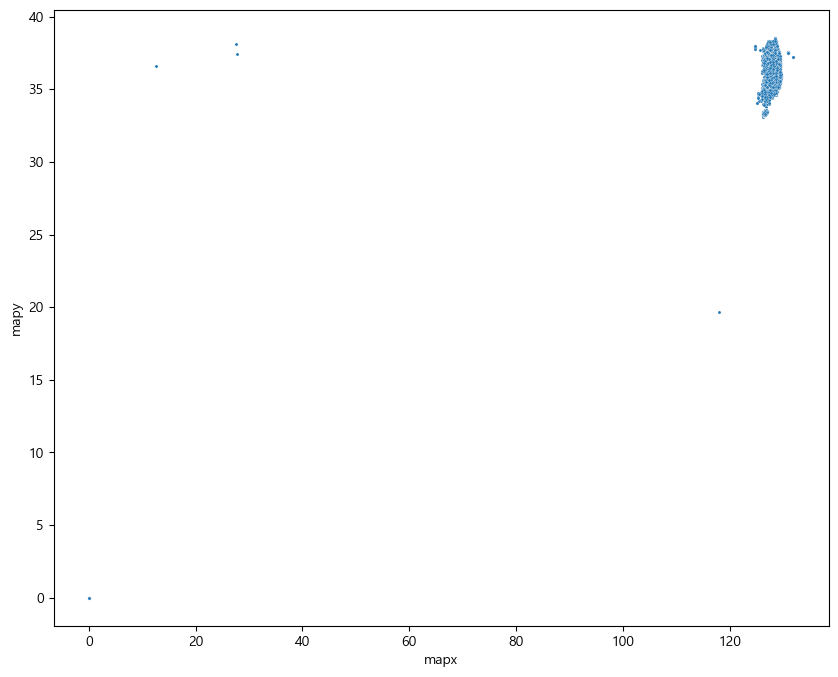

In [202]:
# 경도,위도 이상치 제거전 산점도
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_map,x='mapx',y='mapy',s=5)
# x축과 y축의 범위를 설정하여 '줌 인' 효과 생성
# plt.xlim(124, 130)
# plt.ylim(33, 39)

plt.show()

### 이상치 확인

In [203]:
# 경도의 이상치
df_map['mapx'].describe()

count    13040.000000
mean       127.468581
std          4.570244
min          0.000000
25%        126.900853
50%        127.435399
75%        128.449997
max        131.869689
Name: mapx, dtype: float64

In [204]:
# 경도 이상치 제거
qx1 = df_map['mapx'].quantile(.25)
qx3 = df_map['mapx'].quantile(.75)

# IQR(interquartile range)
IQR = qx3 - qx1

# 하한값계산 Q1 - IQR * 1.5
# 상한값계산 Q3 + IQR * 1.5
# 이상치가 아닌 데이터의 인덱스 찾기
mask_x = (df_map['mapx'] >= (qx1 - IQR * 1.5)) & (df_map['mapx'] <= (qx3 + IQR * 1.5))

# 이상치를 제외한 데이터 필터링
print(len(df_map))
df_map = df_map[mask_x]
print(len(df_map))



13040
12973


In [205]:
# 위도 이상치 제거
qy1 = df_map['mapy'].quantile(.25)
qy3 = df_map['mapy'].quantile(.75)

# IQR(interquartile range)
IQR = qy3 - qy1

# 하한값계산 Q1 - IQR * 1.5
# 상한값계산 Q3 + IQR * 1.5
# 이상치가 아닌 데이터의 인덱스 찾기
mask_y = (df_map['mapy'] >= (qy1 - IQR * 1.5)) & (df_map['mapy'] <= (qy3 + IQR * 1.5))

# 이상치를 제외한 데이터 필터링
print(len(df_map))
df_map = df_map[mask_y]
print(len(df_map))


12973
12973


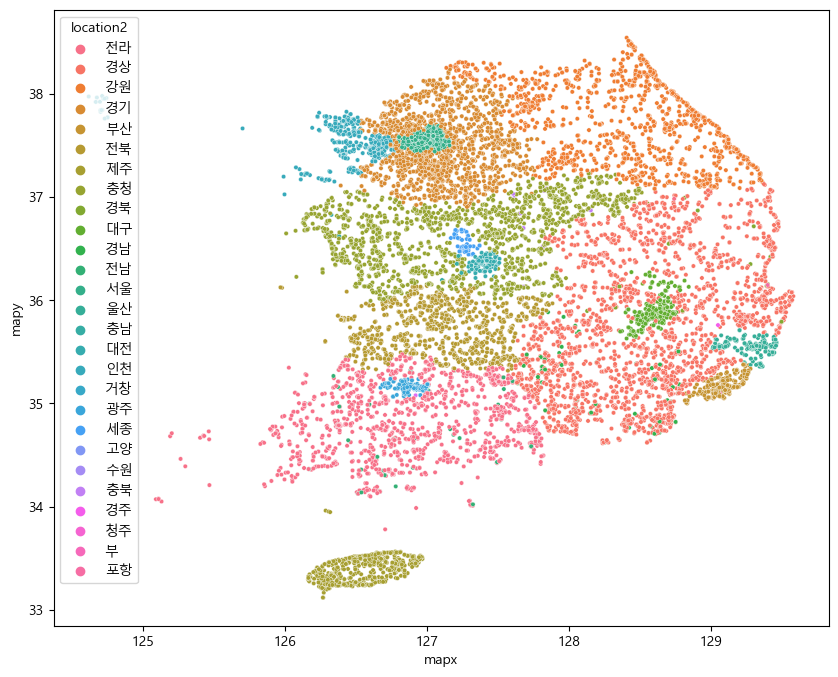

In [206]:
# 경도,위도 이상치 제거후 산점도
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_map,x='mapx',y='mapy', hue='location2', s=10)
# x축과 y축의 범위를 설정하여 '줌 인' 효과 생성
# plt.xlim(124, 130)
# plt.ylim(33, 39)

plt.show()

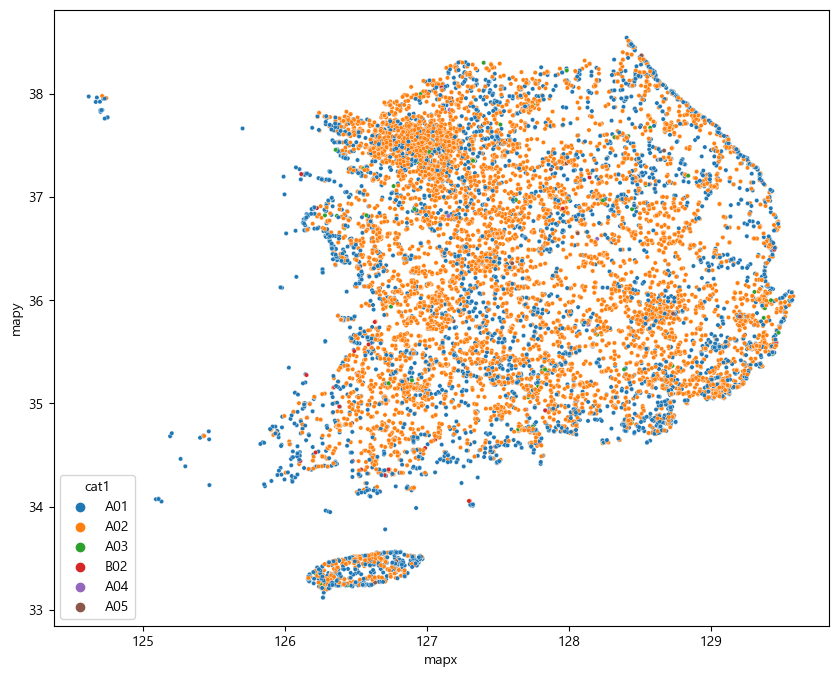

In [208]:
# 경도,위도 이상치 제거후 산점도
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_map,x='mapx',y='mapy', hue='cat1', s=10)
# x축과 y축의 범위를 설정하여 '줌 인' 효과 생성
# plt.xlim(124, 130)
# plt.ylim(33, 39)

plt.show()